In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(font_scale=1.3)

import warnings
warnings.filterwarnings("ignore")

# Простой пример применения EM-алгоритма

Загрузим данные Ирисы Фишера, которые встроены в seaborn.

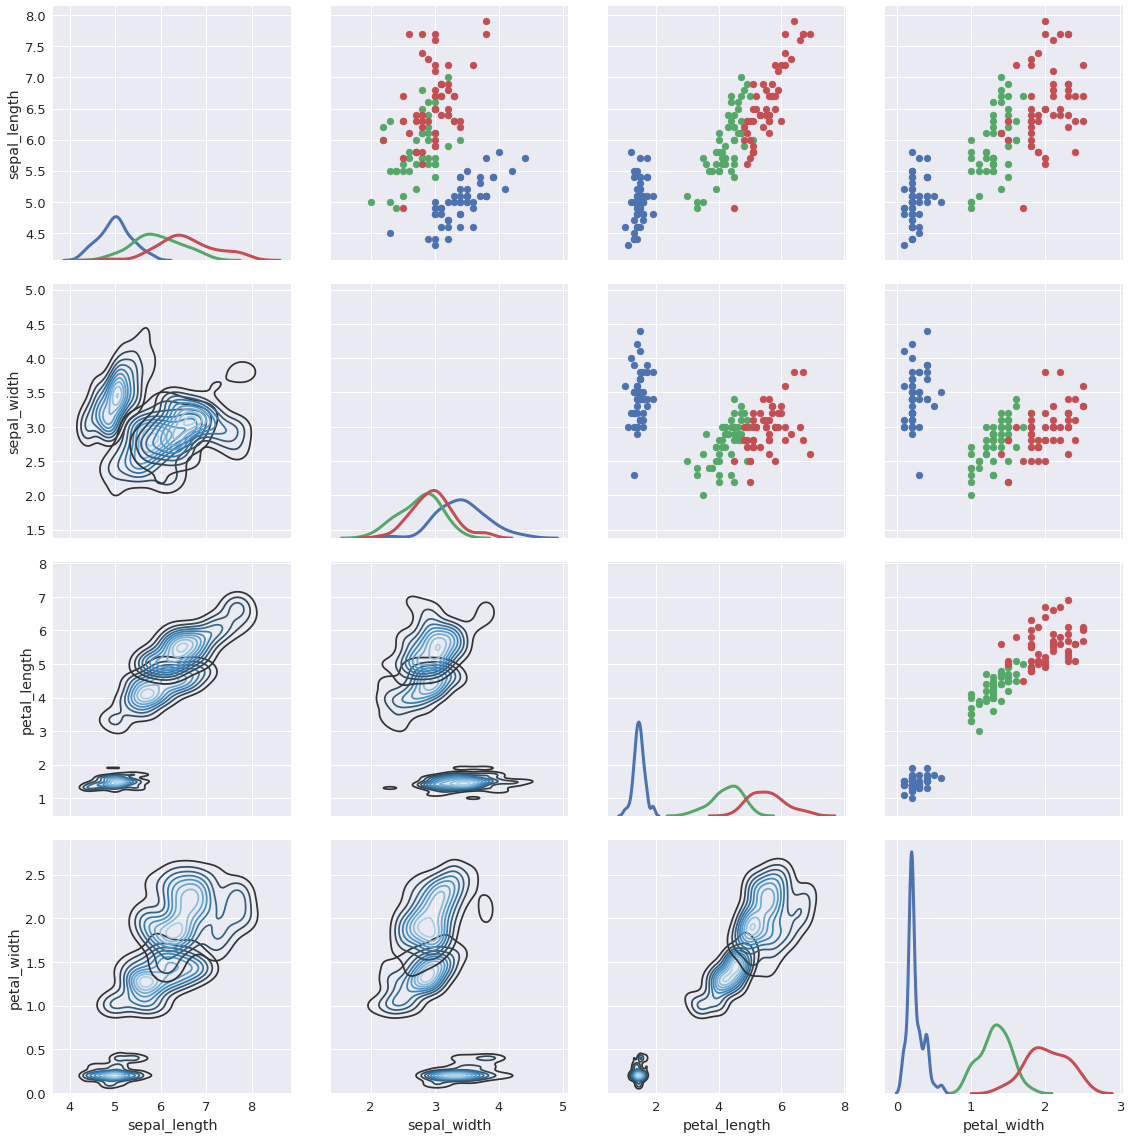

In [2]:
df = sns.load_dataset("iris")

g = sns.PairGrid(df, hue='species', size=4)
g.map_lower(sns.kdeplot, cmap ="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

Для каждого цветка есть 4 вещественных признака и класс, всего 3 различных классов.

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Выделим отдельно фичи и таргет

In [4]:
features, target = df.iloc[:, :-1], np.array(df.iloc[:, -1])

Запустим EM-алгоритм для гауссовской смеси со следующими параметрами:
* 3 компоненты смеси
* 30 запусков из случайного начального приближения
* в каждом запуске не более 100 итераций (по умолчанию)
* ковариационные матрицы полные (по умолчанию)

В конце среди всех запусков будет выбран результат, для которого достигается наибольшее значение нижней оценки на логарифм функции правдоподия (*что это такое -- узнаем в следующем семестре*). Необходимость в совершении нескольких запуском обусловлена тем, что в процессе оптимизации можем сойтись к локальному максимуму, *об этом тоже узнаем в следующем семестре*.

In [5]:
gm = GaussianMixture(n_components=3, n_init=30, init_params='random').fit(features)
gm

GaussianMixture(covariance_type='full', init_params='random', max_iter=100,
        means_init=None, n_components=3, n_init=30, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Оценки вероятностей компонент $\pi_j$ -- 3 шт. по количеству компонент

In [6]:
gm.weights_

array([0.23442013, 0.43229271, 0.33328716])

Оценки средних по компоненте $a_j$ -- три вектора

In [7]:
gm.means_

array([[6.37663541, 2.99340385, 5.33566391, 2.10048193],
       [6.19964849, 2.80610558, 4.67262038, 1.44566857],
       [5.00606979, 3.42815556, 1.46202225, 0.24599237]])

Оценки ковариационых матриц $\Sigma_j$ -- три матрицы

In [8]:
gm.covariances_

array([[[0.27384506, 0.0754741 , 0.16356918, 0.07180626],
        [0.0754741 , 0.07224865, 0.06508785, 0.04181516],
        [0.16356918, 0.06508785, 0.1705582 , 0.07601896],
        [0.07180626, 0.04181516, 0.07601896, 0.06067359]],

       [[0.51159405, 0.13402708, 0.56288448, 0.17578097],
        [0.13402708, 0.11756946, 0.13927102, 0.05646799],
        [0.56288448, 0.13927102, 0.79492247, 0.2474684 ],
        [0.17578097, 0.05646799, 0.2474684 , 0.09200783]],

       [[0.12174654, 0.09716675, 0.01601891, 0.01012917],
        [0.09716675, 0.14066103, 0.01144039, 0.00912166],
        [0.01601891, 0.01144039, 0.02955746, 0.00595   ],
        [0.01012917, 0.00912166, 0.00595   , 0.01088604]]])

Значение нижней оценки на логарифм функции правдоподобия для наилучшего запуска (*что это такое -- узнаем в следующем семестре*)

In [9]:
gm.lower_bound_

-1.2659867247139773

И сколько при этом совершено итераций

In [10]:
gm.n_iter_

23

Оценка класса по принципу $t = argmax\ p_{\theta, \pi} (t|x)$

In [11]:
estimated_labels = gm.predict(features)
estimated_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Посмотрим на точность определения классов. Классы определяются с точностью до перестановки, поэтому сначала может потребоваться выполнить некоторую перестановку.

In [12]:
target[target == 'setosa'] = 2
target[target == 'versicolor'] = 1
target[target == 'virginica'] = 0
(target.astype(int) == estimated_labels).mean()

0.8866666666666667

Можно так же получить сами вероятности принадлежности объекта конкретному классу

In [13]:
gm.predict_proba(features)[:5]

array([[3.17439171e-50, 1.53889706e-11, 1.00000000e+00],
       [5.32139951e-40, 5.56020420e-08, 9.99999944e-01],
       [8.05292008e-44, 9.53587818e-09, 9.99999990e-01],
       [4.50790752e-38, 5.87928582e-08, 9.99999941e-01],
       [1.68265548e-51, 6.08391545e-12, 1.00000000e+00]])

Можно так же попросить выводить подробную информацию для каждой итерации -- изменение нижней оценки на логарифм функции правдоподобия (*что это такое -- узнаем в следующем семестре*) и время, потраченное на итерацию. В конце каждой итерации сообщается, сошелся ли метод.

In [15]:
GaussianMixture(
    n_components=3, n_init=3, init_params='random', 
    verbose=2, verbose_interval=1)\
.fit(features);

Initialization 0
  Iteration 0	 time lapse 0.00456s	 ll change inf
  Iteration 1	 time lapse 0.00278s	 ll change 0.00572
  Iteration 2	 time lapse 0.00273s	 ll change 0.01566
  Iteration 3	 time lapse 0.00263s	 ll change 0.04065
  Iteration 4	 time lapse 0.00251s	 ll change 0.07203
  Iteration 5	 time lapse 0.00285s	 ll change 0.09067
  Iteration 6	 time lapse 0.00247s	 ll change 0.11019
  Iteration 7	 time lapse 0.00260s	 ll change 0.16765
  Iteration 8	 time lapse 0.00542s	 ll change 0.06668
  Iteration 9	 time lapse 0.00283s	 ll change 0.03511
  Iteration 10	 time lapse 0.00298s	 ll change 0.04554
  Iteration 11	 time lapse 0.00294s	 ll change 0.07325
  Iteration 12	 time lapse 0.00301s	 ll change 0.09514
  Iteration 13	 time lapse 0.00287s	 ll change 0.15174
  Iteration 14	 time lapse 0.00270s	 ll change 0.23498
  Iteration 15	 time lapse 0.00277s	 ll change 0.03398
  Iteration 16	 time lapse 0.00288s	 ll change 0.00582
  Iteration 17	 time lapse 0.00280s	 ll change 0.00500
  Itera

Визуализация полученого разделения смеси

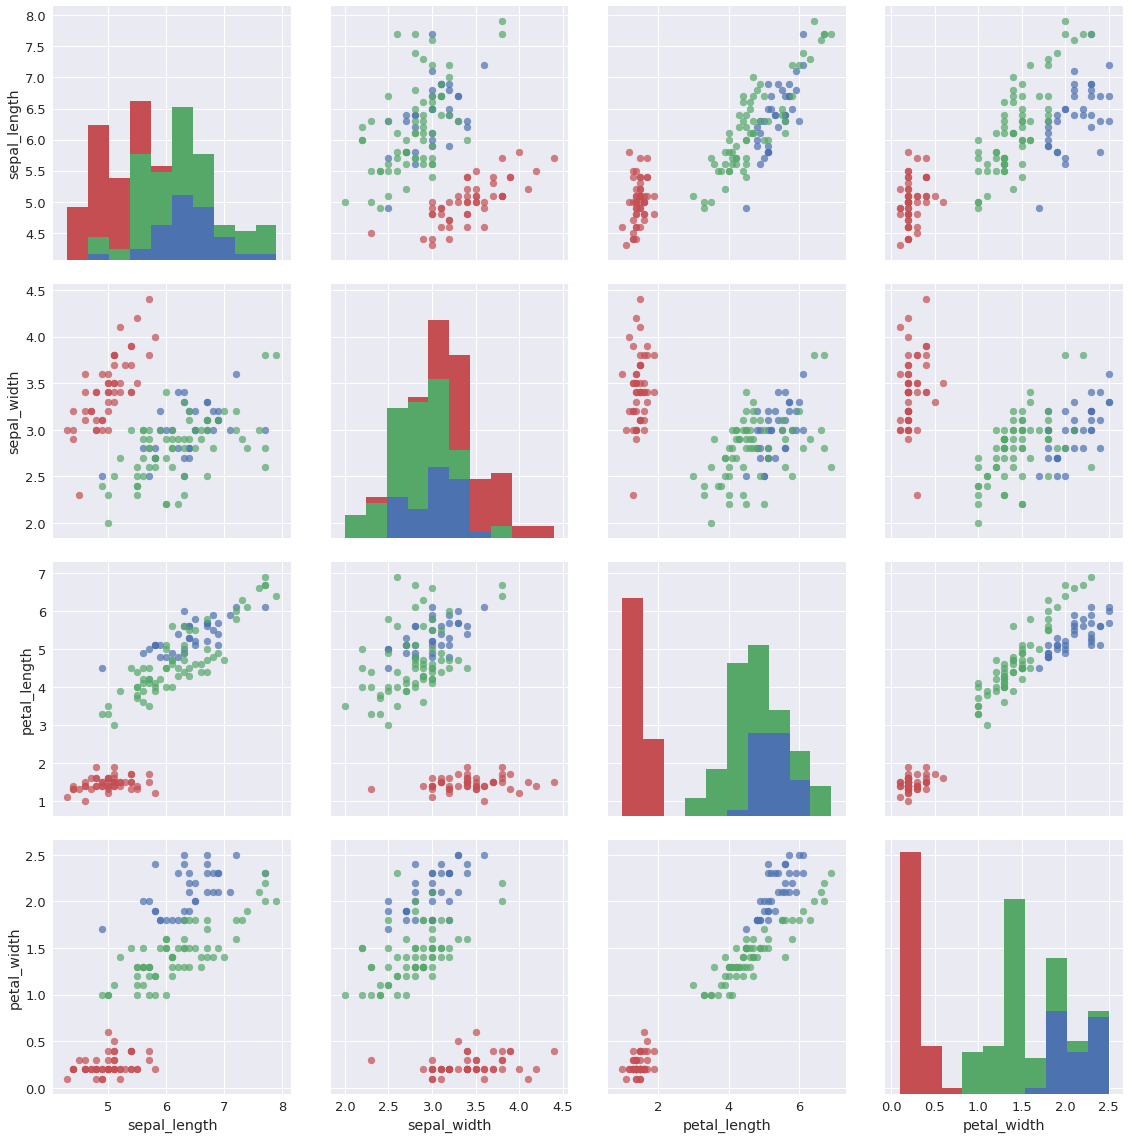

In [17]:
df['estimated_labels'] = estimated_labels.astype(str)
g = sns.PairGrid(df, hue='estimated_labels', size=4, vars=df.columns[:4])
g.map_offdiag(plt.scatter, alpha=0.7)
g.map_diag(plt.hist);